## utility functions

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curves(model, title):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(model.train_acc_history, label='Training Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(model.train_loss_history, label='Training Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.suptitle(title)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    
def display_filters(filters):
    n_filters, n_channels, _, _ = filters.shape

    plt.figure(figsize=(n_filters * 2, n_channels * 2), facecolor='white')

    row = 1
    for n in range(n_filters):
        for c in range(n_channels):
            plt.subplot(n_channels, n_filters, row)
            row += 1
            fltr = filters[n, c, :, :]
            plt.imshow(fltr, cmap='gray')
            plt.axis('off')

    plt.show()

    
def plot_layer_representations(model, x_data):
    plt.figure(figsize=(20, 12)) 

    for i in range(10):
        plt.subplot(12, 10, i + 1)
        plt.imshow(x_data[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    
        output = model.forward(x_data[i].reshape(-1, 1, 28, 28), training=True)
    
        # layer1 outputs
        for j in range(4):
            plt.subplot(12, 10, i + 11 + j*10)
            plt.imshow(model.layers[0].output[0][j], cmap='gray')
            plt.axis('off')
    
        # layer2 outputs
        for j in range(4):
            plt.subplot(12, 10, i + 51 + j*10)
            plt.imshow(model.layers[2].output[0][j], cmap='gray')
            plt.axis('off')
    


## Load data

In [1]:
import numpy as np
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

x_train = x_train[:8000]
y_train = y_train[:8000]

x_train1k = x_train[:1000]
y_train1k = y_train[:1000]

x_train1k_c = x_train1k.reshape(-1, 1, 28, 28)

x_train_c = x_train.reshape(-1, 1, 28, 28)
x_test_c = x_test.reshape(-1, 1, 28, 28)

labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Train convolutional autoencoders

In [3]:
from models import Model, Layer_Dense, Activation_ReLU, Optimizer_Adam, Loss_MeanSquaredError, Accuracy_Regression, Activation_Sigmoid, MaxPoolingLayer, ConvolutionalLayer, FlattenLayer

model1 = Model()

model1.add(ConvolutionalLayer(filters=16, kernel_size=3, in_channels=1, stride=1, padding=1))
model1.add(MaxPoolingLayer(pool_size=2, stride=2))
model1.add(ConvolutionalLayer(filters=16, kernel_size=3, in_channels=16, stride=1, padding=1))
model1.add(MaxPoolingLayer(pool_size=2, stride=2))
model1.add(FlattenLayer())
model1.add(Layer_Dense(7*7*16, 400))
model1.add(Activation_ReLU())
model1.add(Layer_Dense(400, 784))
model1.add(Activation_Sigmoid())

model1.set(loss=Loss_MeanSquaredError(), optimizer=Optimizer_Adam(learning_rate=0.001, decay=1e-5), accuracy=Accuracy_Regression())
model1.finalize()

model1.train(x_train1k_c, x_train1k, validation_data=(x_test_c, x_test), epochs=10, batch_size=100, print_every=1)

model1.save('./trained_models/convolutional_autoencoder_e10_bs128_lr0.001_d1e-5_f4.4_ks_3.3_stride1.1.model')


epoch: 1
Epoch: 1/10 - Batch: 10/10 (1000/1000 samples) - 100.00% complete - Elapsed Time: 15.65 sec
training, epoch: 1, acc: 356.602, loss: 0.121 (data_loss: 0.121, reg_loss: 0.000), lr: 0.0009999100080992712
validation, acc: 380.829, loss: 0.090
epoch: 2
Epoch: 2/10 - Batch: 4/10 (400/1000 samples) - 40.00% complete - Elapsed Time: 6.11 sec

KeyboardInterrupt: 

In [25]:
from models import Model, Layer_Dense, Activation_ReLU, Optimizer_Adam,  Loss_MeanSquaredError, Accuracy_Regression, Activation_Sigmoid, MaxPoolingLayer, ConvolutionalLayer, FlattenLayer

model2 = Model()

model2.add(ConvolutionalLayer(filters=16, kernel_size=3, in_channels=1, stride=1, padding=1))
model2.add(MaxPoolingLayer(pool_size=2, stride=2))
model2.add(ConvolutionalLayer(filters=16, kernel_size=3, in_channels=16, stride=1, padding=1))
model2.add(MaxPoolingLayer(pool_size=2, stride=2))
model2.add(FlattenLayer())
model2.add(Layer_Dense(7*7*16, 400))
model2.add(Activation_ReLU())
model2.add(Layer_Dense(400, 784))
model2.add(Activation_Sigmoid())

model2.set(loss=Loss_MeanSquaredError(), optimizer=Optimizer_Adam(learning_rate=0.001, decay=1e-5), accuracy=Accuracy_Regression())
model2.finalize()

model2.train(x_train1k_c, x_train1k, validation_data=(x_test_c, x_test), epochs=10, batch_size=100, print_every=1)

model2.save('./trained_models/convolutional_autoencoder_e10_bs128_lr0.001_d1e-5_f4.4_ks_3.3_stride1.1.model')

epoch: 1
Epoch: 1/10 - Batch: 10/10 (1000/1000 samples) - 100.00% complete - Elapsed Time: 155.58 sec
training, epoch: 1, acc: 357.847, loss: 0.120 (data_loss: 0.120, reg_loss: 0.000), lr: 0.0009999100080992712
validation, acc: 383.020, loss: 0.089
epoch: 2
Epoch: 2/10 - Batch: 10/10 (1000/1000 samples) - 100.00% complete - Elapsed Time: 172.01 sec
training, epoch: 2, acc: 388.197, loss: 0.078 (data_loss: 0.078, reg_loss: 0.000), lr: 0.0009998100360931424
validation, acc: 383.318, loss: 0.068
epoch: 3
Epoch: 3/10 - Batch: 10/10 (1000/1000 samples) - 100.00% complete - Elapsed Time: 170.67 sec
training, epoch: 3, acc: 390.789, loss: 0.062 (data_loss: 0.062, reg_loss: 0.000), lr: 0.0009997100840756182
validation, acc: 385.295, loss: 0.057
epoch: 4
Epoch: 4/10 - Batch: 10/10 (1000/1000 samples) - 100.00% complete - Elapsed Time: 172.43 sec
training, epoch: 4, acc: 393.344, loss: 0.054 (data_loss: 0.054, reg_loss: 0.000), lr: 0.0009996101520407042
validation, acc: 386.746, loss: 0.051
epoc

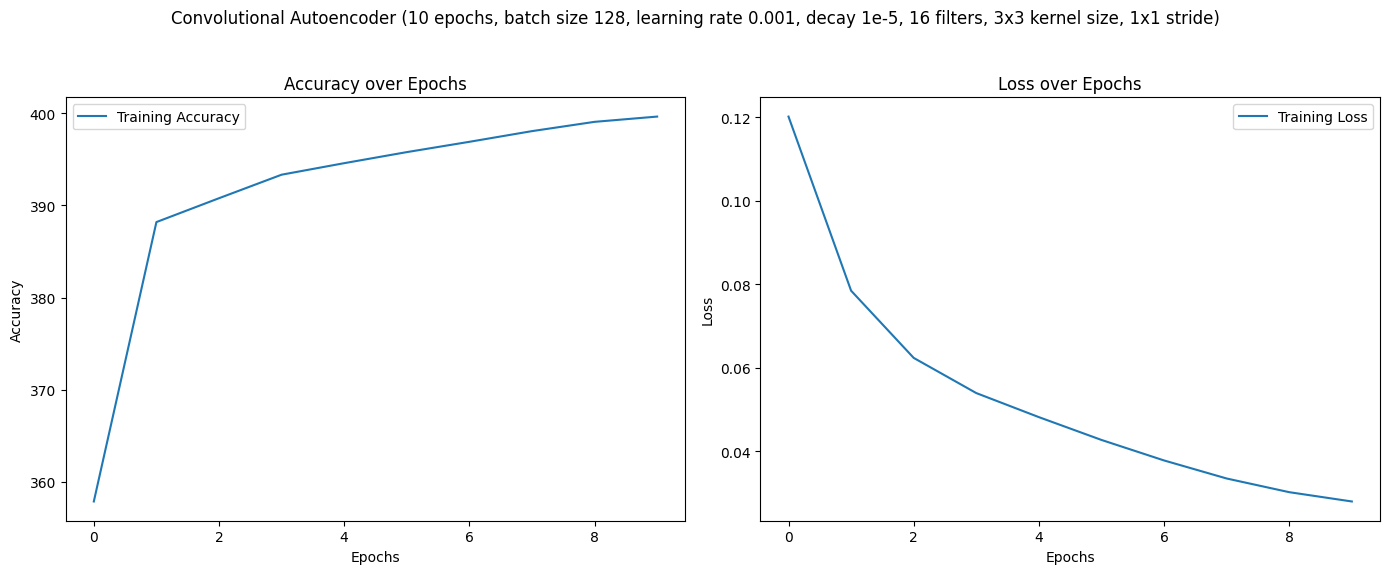

In [31]:
plot_learning_curves(model2, 'Convolutional Autoencoder (10 epochs, batch size 128, learning rate 0.001, decay 1e-5, 16 filters, 3x3 kernel size, 1x1 stride)')

In [3]:
from models import Model
model1 = Model.load('./trained_models/convolutional_autoencoder_e10_bs128_lr0.001_d1e-5_f4.4_ks_3.3_stride1.1.model')

In [4]:
plot_learning_curves(model1, 'Convolutional Autoencoder (10 epochs, batch size 128, learning rate 0.001, decay 1e-5, 4 filters, 3x3 kernel size, 1x1 stride)')

NameError: name 'plot_learning_curves' is not defined

## Plot hidden layers representations as images


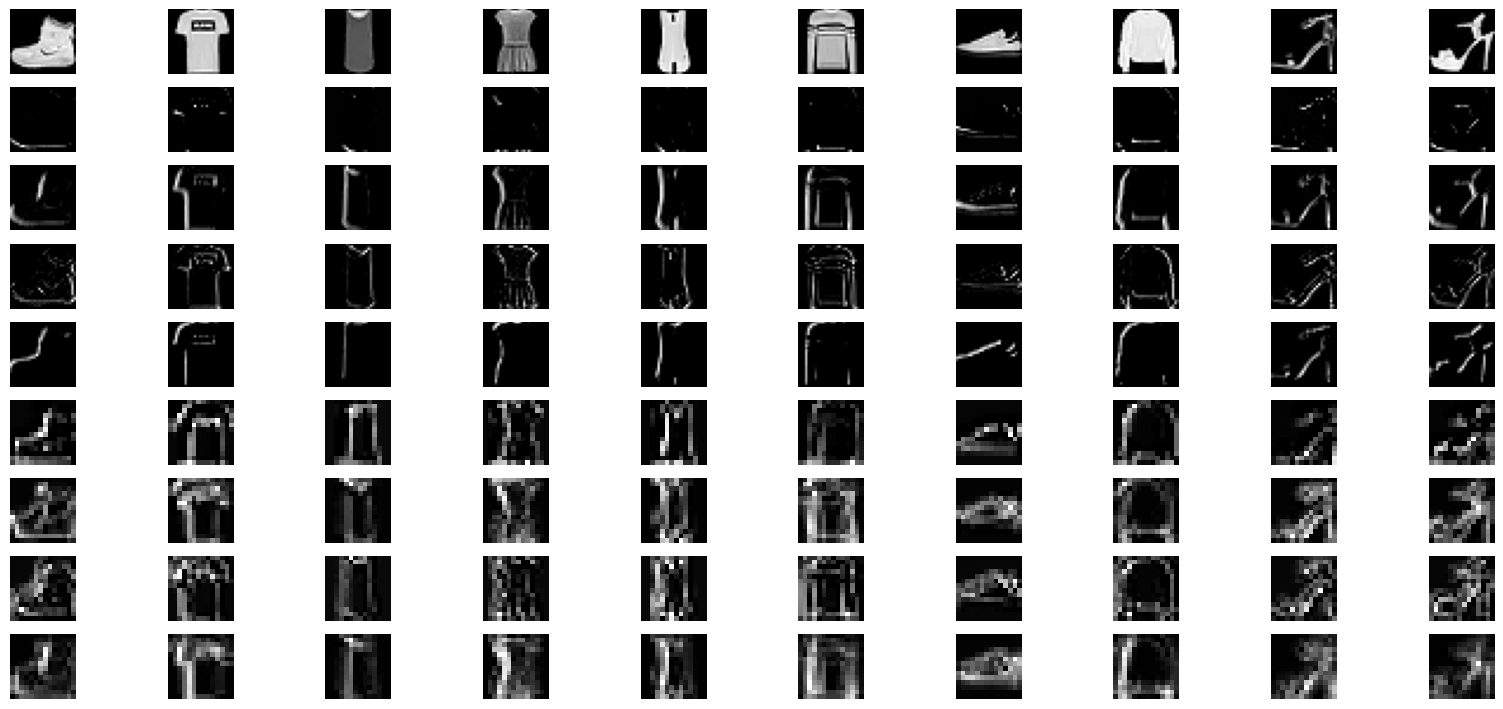

In [20]:
plot_layer_representations(model1, x_train1k_c)


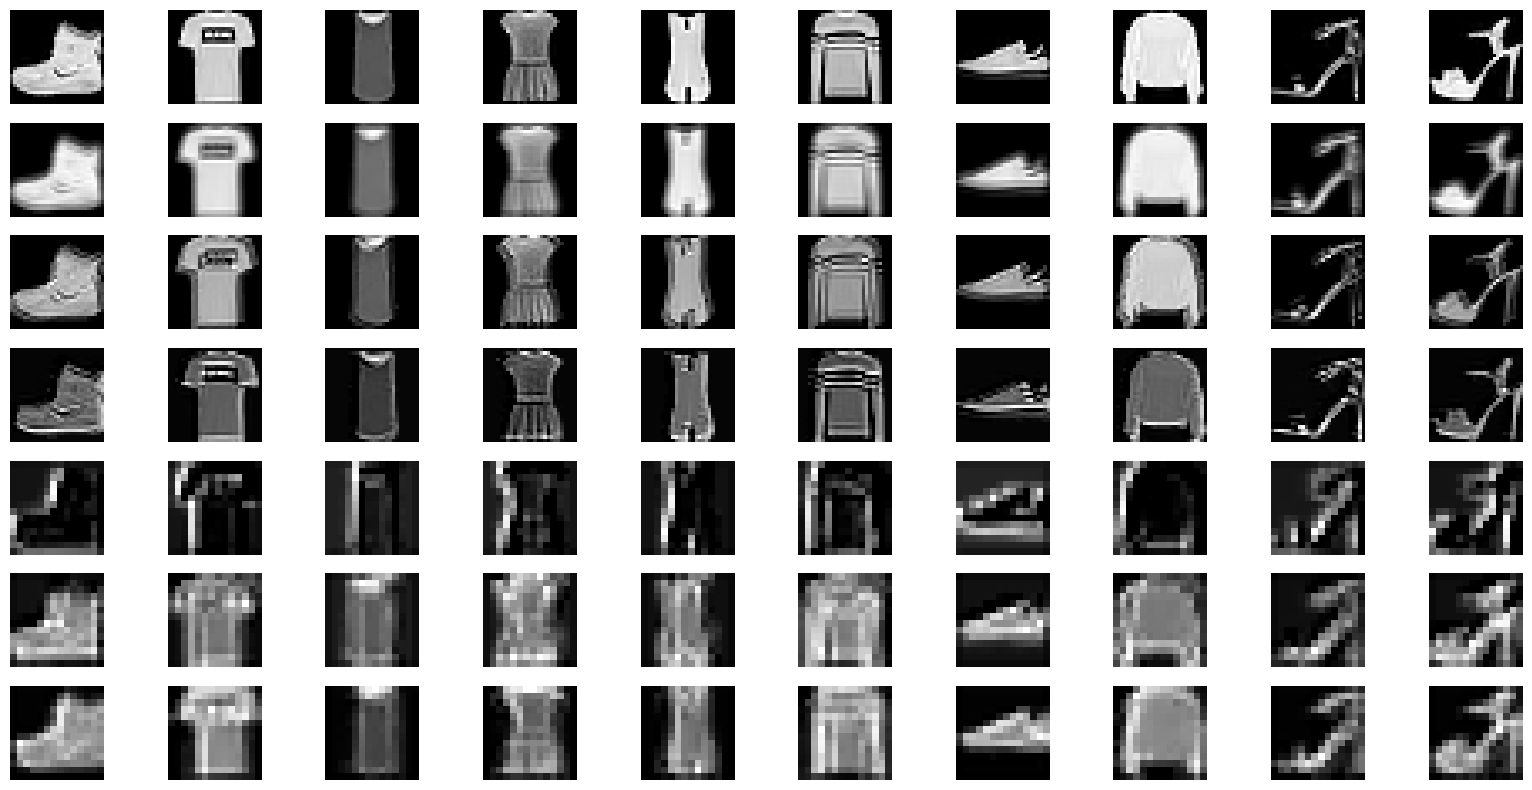

In [37]:
plot_layer_representations(model2, x_train1k_c)

## plot filters

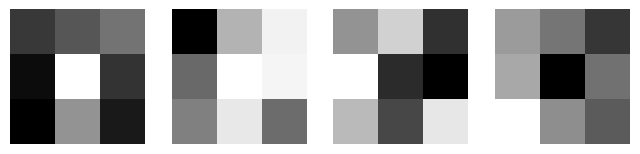

In [26]:
display_filters(model1.layers[0].weights)

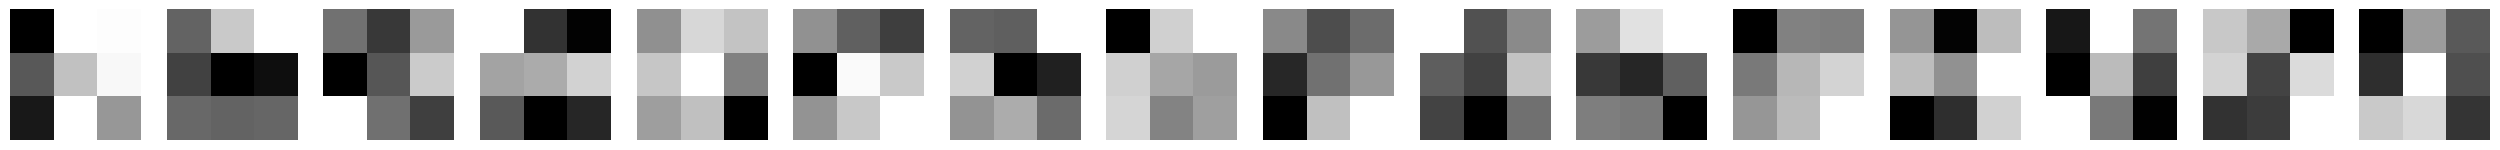

In [34]:
display_filters(model2.layers[0].weights)


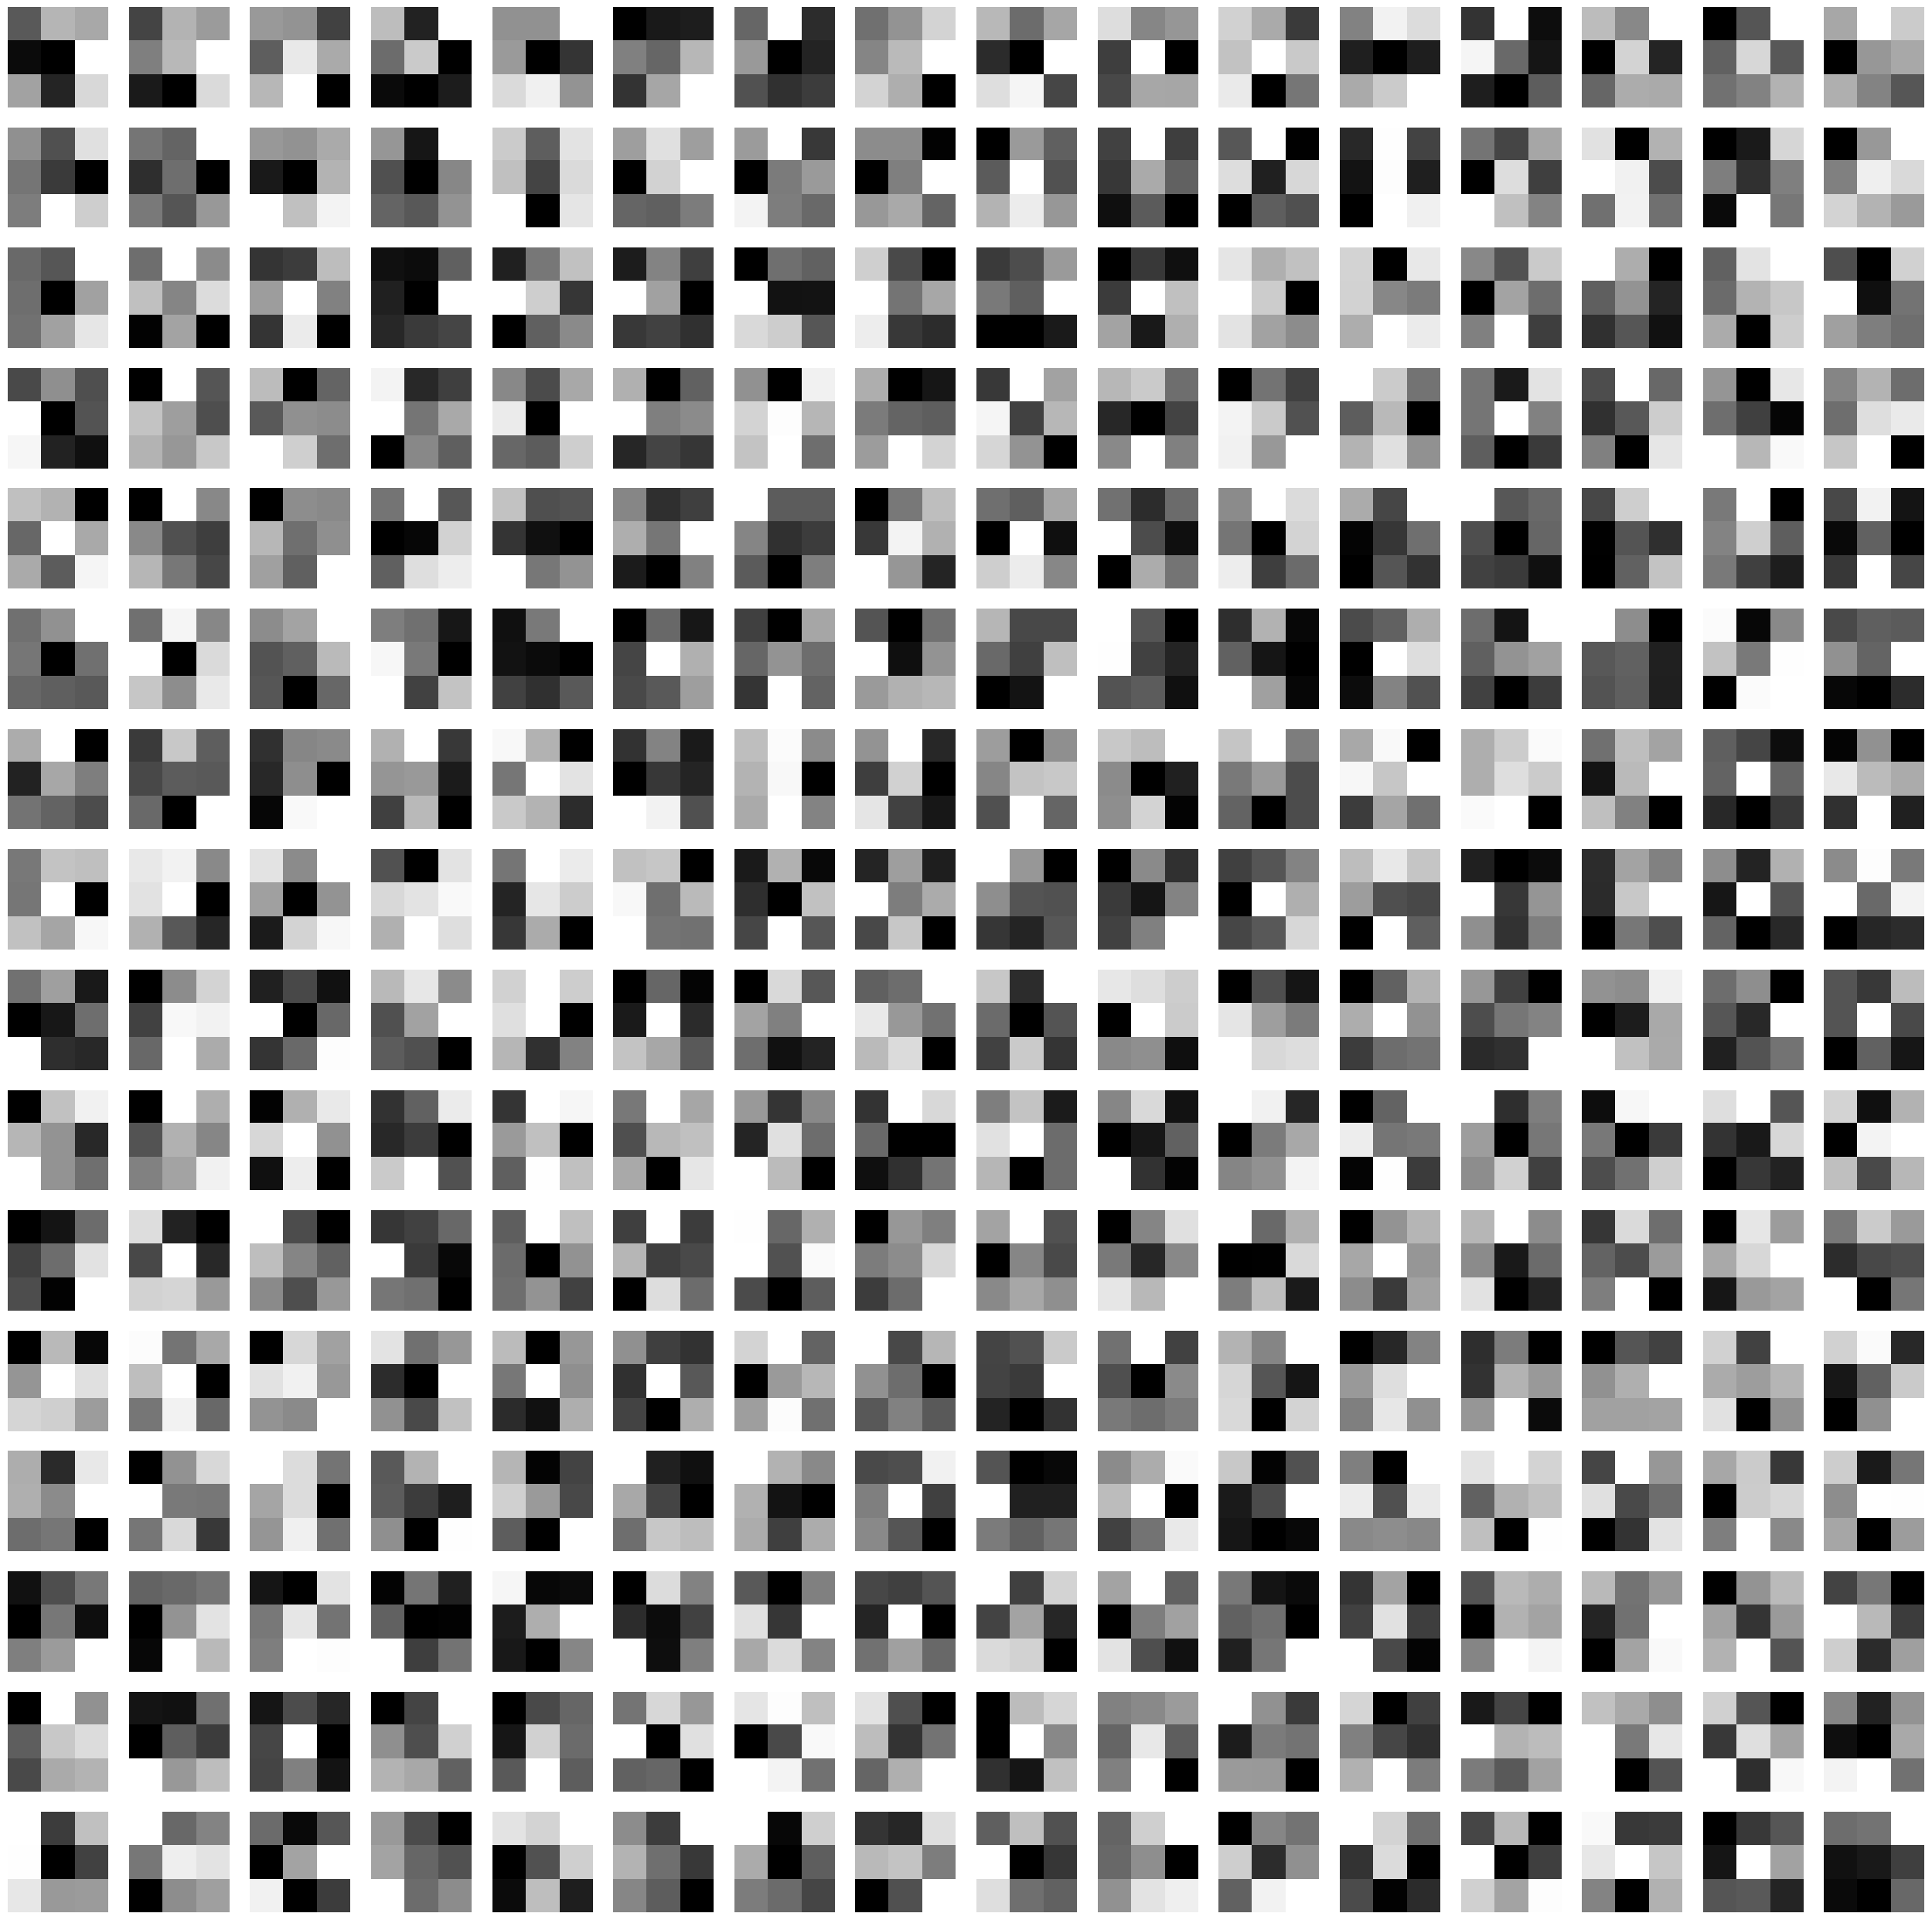

In [35]:
display_filters(model2.layers[2].weights)


## Visualize unseen data in a space of low dimensionality using umaps

In [5]:
import umap


train_features = model1.get_activations(x_train_c)  # Modify as per your model structure
test_features = model1.get_activations(x_test_c)    # Modify as per your model structure

selected_train_features = train_features[5]  # Using the dense layer as an example
selected_test_features = test_features[5]

reducer = umap.UMAP(random_state=42)
reducer.fit(selected_train_features)

umap_train = reducer.transform(selected_train_features)
umap_test = reducer.transform(selected_test_features)


plt.figure(figsize=(24, 10))

plt.scatter(umap_train[:, 0], umap_train[:, 1], c=y_train, cmap='Spectral', s=5, alpha=0.5)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of Train Data', fontsize=18)

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.scatter(umap_test[:, 0], umap_test[:, 1], c=y_test, cmap='Spectral', s=5, alpha=0.5)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of Test Data', fontsize=18)

plt.show()

C:\Users\JakubSyska\.virtualenvs\NeuralNetworksLab1\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


NameError: name 'plt' is not defined

In [27]:
model1.forward(x_train_c, training=True)
encoded_x_train = model1.layers[5].inputs
model1.forward(x_test_c, training=True)
encoded_x_test = model1.layers[5].inputs




In [33]:
from models import Loss_CategoricalCrossentropy, Accuracy_Categorical, Activation_Softmax, Activation_Sigmoid

classifier_from_encoded = Model()
classifier_from_encoded.add(Layer_Dense(196, 150))
classifier_from_encoded.add(Activation_ReLU())
classifier_from_encoded.add(Layer_Dense(150, 150))
classifier_from_encoded.add(Activation_ReLU())
classifier_from_encoded.add(Layer_Dense(150, 10))
classifier_from_encoded.add(Activation_Softmax())

classifier_from_encoded.set(loss=Loss_CategoricalCrossentropy(), optimizer=Optimizer_Adam(learning_rate=0.001, decay=1e-5), accuracy=Accuracy_Categorical())

classifier_from_encoded.finalize()

classifier_from_encoded.train(encoded_x_train, y_train, validation_data=(encoded_x_test, y_test), epochs=10, batch_size=100, print_every=1)



epoch: 1
Epoch: 1/10 - Batch: 80/80 (8000/8000 samples) - 100.00% complete - Elapsed Time: 0.20 sec
training, epoch: 1, acc: 0.477, loss: 1.455 (data_loss: 1.455, reg_loss: 0.000), lr: 0.0009992106236073502
validation, acc: 0.633, loss: 0.953
epoch: 2
Epoch: 2/10 - Batch: 80/80 (8000/8000 samples) - 100.00% complete - Elapsed Time: 0.17 sec
training, epoch: 2, acc: 0.692, loss: 0.806 (data_loss: 0.806, reg_loss: 0.000), lr: 0.0009984125240867022
validation, acc: 0.723, loss: 0.751
epoch: 3
Epoch: 3/10 - Batch: 80/80 (8000/8000 samples) - 100.00% complete - Elapsed Time: 0.19 sec
training, epoch: 3, acc: 0.742, loss: 0.680 (data_loss: 0.680, reg_loss: 0.000), lr: 0.0009976156984806313
validation, acc: 0.746, loss: 0.680
epoch: 4
Epoch: 4/10 - Batch: 80/80 (8000/8000 samples) - 100.00% complete - Elapsed Time: 0.13 sec
training, epoch: 4, acc: 0.761, loss: 0.627 (data_loss: 0.627, reg_loss: 0.000), lr: 0.0009968201437414647
validation, acc: 0.758, loss: 0.647
epoch: 5
Epoch: 5/10 - Batch

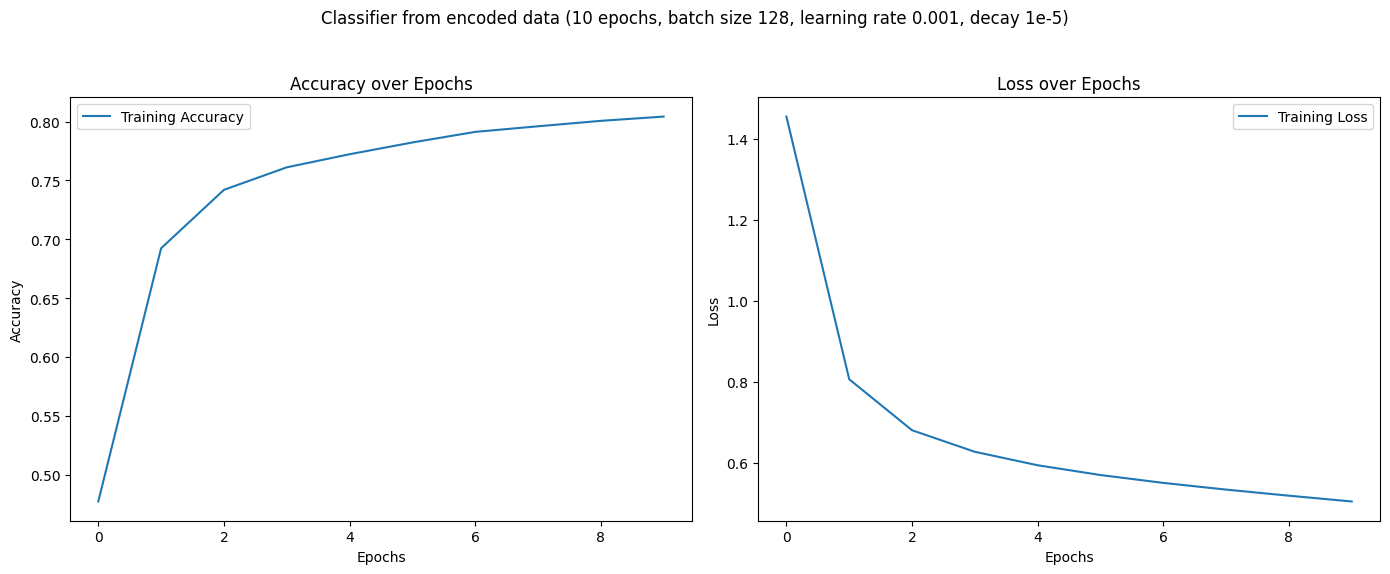

In [35]:
plot_learning_curves(classifier_from_encoded, 'Classifier from encoded data (10 epochs, batch size 128, learning rate 0.001, decay 1e-5)')

In [34]:
classifier = Model()

classifier.add(Layer_Dense(784, 150))
classifier.add(Activation_ReLU())
classifier.add(Layer_Dense(150, 150))
classifier.add(Activation_ReLU())
classifier.add(Layer_Dense(150, 10))
classifier.add(Activation_Softmax())

classifier.set(loss=Loss_CategoricalCrossentropy(), optimizer=Optimizer_Adam(learning_rate=0.001, decay=1e-5), accuracy=Accuracy_Categorical())

classifier.finalize()

classifier.train(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100, print_every=1)

epoch: 1
Epoch: 1/10 - Batch: 80/80 (8000/8000 samples) - 100.00% complete - Elapsed Time: 0.35 sec
training, epoch: 1, acc: 0.524, loss: 1.298 (data_loss: 1.298, reg_loss: 0.000), lr: 0.0009992106236073502
validation, acc: 0.647, loss: 0.893
epoch: 2
Epoch: 2/10 - Batch: 80/80 (8000/8000 samples) - 100.00% complete - Elapsed Time: 0.36 sec
training, epoch: 2, acc: 0.695, loss: 0.763 (data_loss: 0.763, reg_loss: 0.000), lr: 0.0009984125240867022
validation, acc: 0.737, loss: 0.724
epoch: 3
Epoch: 3/10 - Batch: 80/80 (8000/8000 samples) - 100.00% complete - Elapsed Time: 0.31 sec
training, epoch: 3, acc: 0.765, loss: 0.637 (data_loss: 0.637, reg_loss: 0.000), lr: 0.0009976156984806313
validation, acc: 0.767, loss: 0.652
epoch: 4
Epoch: 4/10 - Batch: 80/80 (8000/8000 samples) - 100.00% complete - Elapsed Time: 0.31 sec
training, epoch: 4, acc: 0.797, loss: 0.562 (data_loss: 0.562, reg_loss: 0.000), lr: 0.0009968201437414647
validation, acc: 0.782, loss: 0.613
epoch: 5
Epoch: 5/10 - Batch

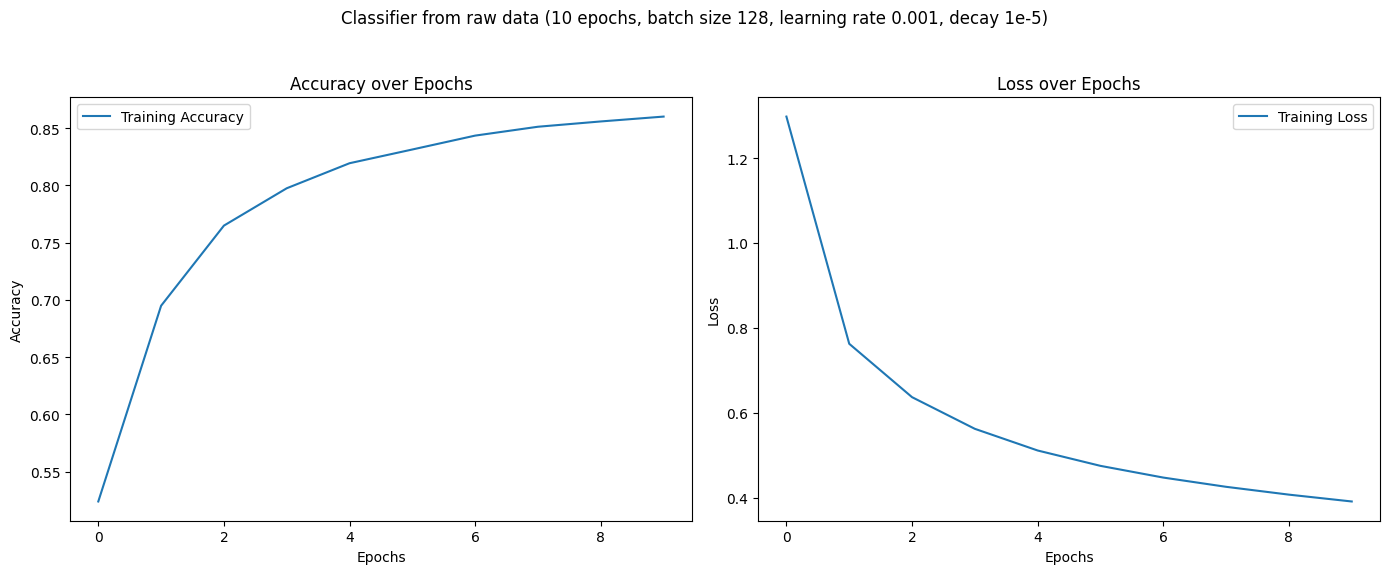

In [36]:
plot_learning_curves(classifier, 'Classifier from raw data (10 epochs, batch size 128, learning rate 0.001, decay 1e-5)')